# Binary Classification with Gaussian Naive Bayes

In this notebook, we'll implement binary classification with Gaussian Naive Bayes on the `AGE` and `nr_11` columns of the [Myocardial infarction complications - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications) dataset.

### Import Packages

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

### Load Data

In [2]:
# Read the input data into a `DataFrame`:
df = pd.read_csv("MI.data")

In [3]:
# Get the columns at indices 1, 12 (columns `AGE` and `nr_11`):
df_data = df.iloc[:, [1,12]].copy()

### Data Preprocessing

In [4]:
# Remove rows that contain the invalid value '?' in either column:
df_data.replace('?', np.NaN, inplace=True)
df_data.dropna(inplace=True)

In [5]:
# Use the column at index 1 (column `AGE`) as `X``:
X = df_data.iloc[:, 0].astype(float).values

# Use the column at index 12 (column `nr_11`) as `y`:
y = df_data.iloc[:, 1].astype(float).values

In [6]:
# Split the dataset into training and testing datasets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [7]:
X_train

array([62., 60., 71., ..., 73., 75., 81.])

In [8]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

### Data Visualization

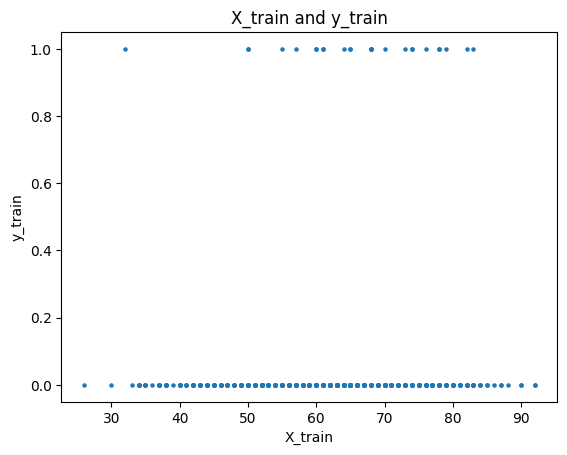

In [9]:
# Plot `X_train` and `y_train`:
plt.scatter(X_train, y_train, s=5)
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.title("X_train and y_train")
plt.show()

### Binary Classification with Gaussian Naive Bayes

In [10]:
# Reshape `X_train` and `X_test` into 2D arrays to fit `GaussianNB`:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [11]:
X_train

array([[62.],
       [60.],
       [71.],
       ...,
       [73.],
       [75.],
       [81.]])

In [12]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
# Fit with Gaussian Naive Bayes and make predictions on `X_test`:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [14]:
# Evaluate:
print("Classification report on testing data:")
print(classification_report(y_test, y_pred))
print("Accuracy score on testing data:")
print(accuracy_score(y_test, y_pred))

Classification report on testing data:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       653
         1.0       0.00      0.00      0.00        15

    accuracy                           0.98       668
   macro avg       0.49      0.50      0.49       668
weighted avg       0.96      0.98      0.97       668

Accuracy score on testing data:
0.9775449101796407


/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


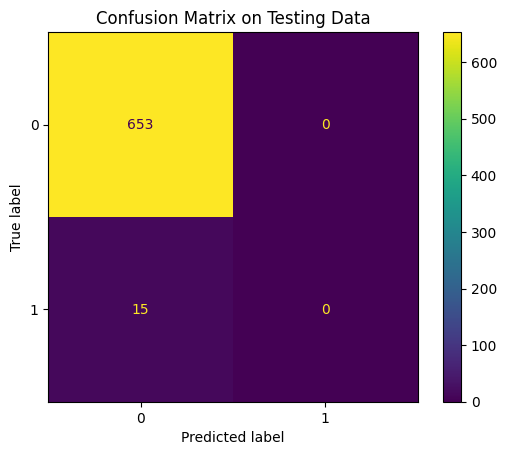

In [15]:
# Plot the confusion matrix:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.title("Confusion Matrix on Testing Data")
plt.show()

### Result Analysis

The accuracy score is very high and the confusion matrix show that the predictions good (although not perfect). This means that the Gaussian Naive Bayes classifier works well on making classifications on data from the two columns of the dataset.